In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
df_encode = df.copy()
for col in df_encode.columns:
    df_encode[col] = df_encode[col].astype('category')
    df_encode[col] = df_encode[col].cat.codes
df_encode.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


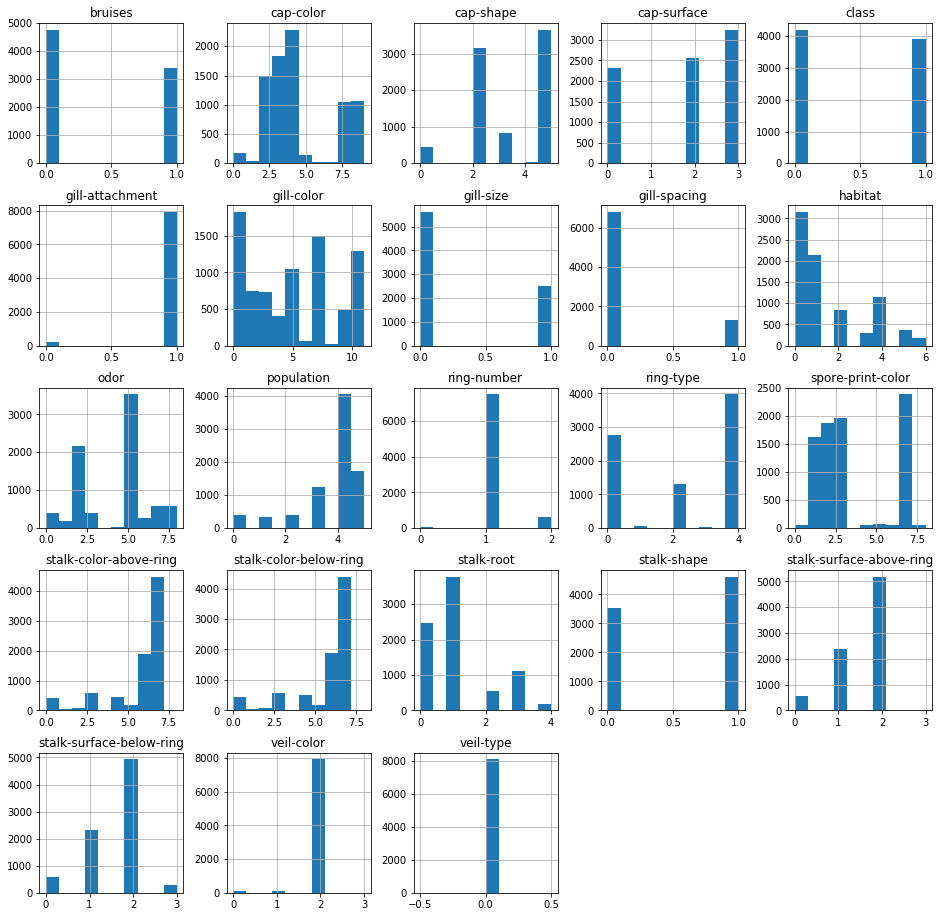

In [5]:
df_encode.hist(figsize=(16,16));

In [6]:
df_encode.corr()['class']

class                       1.000000
cap-shape                   0.052951
cap-surface                 0.178446
cap-color                  -0.031384
bruises                    -0.501530
odor                       -0.093552
gill-attachment             0.129200
gill-spacing               -0.348387
gill-size                   0.540024
gill-color                 -0.530566
stalk-shape                -0.102019
stalk-root                 -0.379361
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
veil-type                        NaN
veil-color                  0.145142
ring-number                -0.214366
ring-type                  -0.411771
spore-print-color           0.171961
population                  0.298686
habitat                     0.217179
Name: class, dtype: float64

In [7]:
target = df_encode['class']
features = df_encode.drop('class', axis=1)

In [9]:
# Define a function to print selected model metrics
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_curve, auc)

def print_metrics(y_true, y_pred):
    '''Print accuracy score, confusion matrix, and classification report.
    
    Keyword arguments:
    y_true: groud-truth labels
    y_pred: predicted labels
    
    Dependencies: 
    sklearn.metrics.accuracy_score
    sklearn.metrics.confusion_matrix
    sklearn.metrics.classification_report
    '''
    acc_score = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)
    print('Accuracy:', acc_score)
    print('-------')
    print('Confusion matrix:')
    print(conf_matrix)
    print('-------')
    print('Classification report:')
    print(class_report)

def roc_it(y_true, y_pred, model_name, figsize=(12,10)):
    '''Plot ROC with a separate curve for each class.
    
        Keyword arguments:
    y_true: ground-truth labels
    y_pred: predicted labels
    model_name: name to print in the plot title
    
    Dependencies:
    pandas aliased as pd
    sklearn.metrics.roc_curve
    sklearn.metrics.auc
    matplotlib.pyplot aliased as plt
    '''
    y_true_dum = pd.get_dummies(y_true)
    y_pred_dum = pd.get_dummies(y_pred)
    n_classes = y_true.nunique()
    
    fprs = []
    tprs = []
    aucs = []

    for i in range(1,n_classes+1):
        fpr, tpr, _ = roc_curve(y_true_dum.loc[:,i], y_pred_dum.loc[:,i])
        fprs.append(fpr)
        tprs.append(tpr)
        aucs.append(round(auc(fpr, tpr),2))
        
    plt.figure(figsize=figsize)
    for i in range(n_classes):
        plt.plot(fprs[i], tprs[i], label='Class: {}, AUC: {}'.format(i+1, 
                                                                     aucs[i]))
    plt.plot([0.0,1.0], [0.0,1.0], linestyle='--')
    plt.title('ROC curves by class for {}'.format(model_name))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend();

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(features, target)
y_pred = rf.predict(features)

/Users/jennykreiger/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [10]:
print_metrics(target, y_pred)

Accuracy: 1.0
-------
Confusion matrix:
[[4208    0]
 [   0 3916]]
-------
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4208
           1       1.00      1.00      1.00      3916

   micro avg       1.00      1.00      1.00      8124
   macro avg       1.00      1.00      1.00      8124
weighted avg       1.00      1.00      1.00      8124



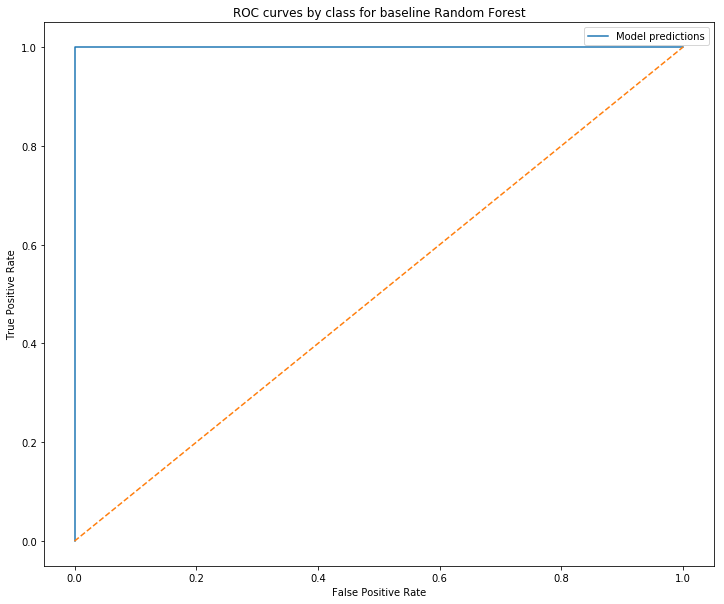

In [16]:
# roc_it(target, y_pred, 'Baseline Random Forest')

fpr, tpr, _ = roc_curve(target, y_pred)
auc_values = round(auc(fpr, tpr),2)
        
plt.figure(figsize=(12,10))
plt.plot(fpr, tpr, label='Model predictions')
plt.plot([0.0,1.0], [0.0,1.0], linestyle='--')
plt.title('ROC curves by class for baseline Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend();

In [ ]:
from 